# **Boston House Price Prediction - Linear Regression**

## **Importing the necessary libraries and overview of the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [2]:
df = pd.read_csv("HousingData.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### **Checking the info of the data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## **Exploratory Data Analysis and Data Preprocessing**

### **Summary Statistics of this Dataset**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


### **Univariate Analysis**

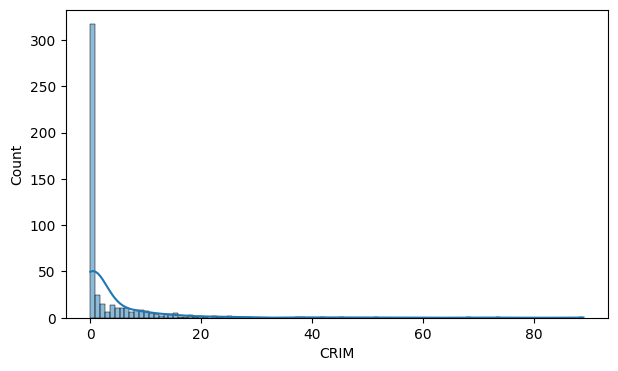

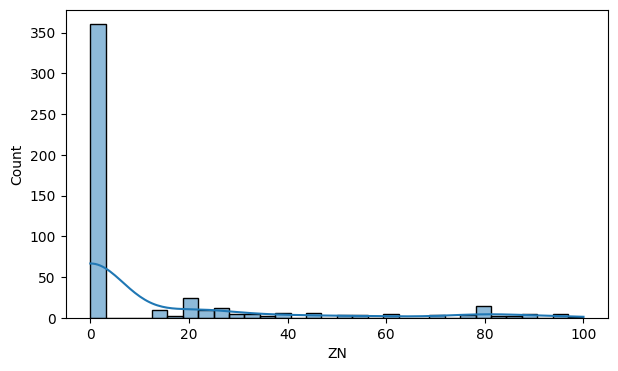

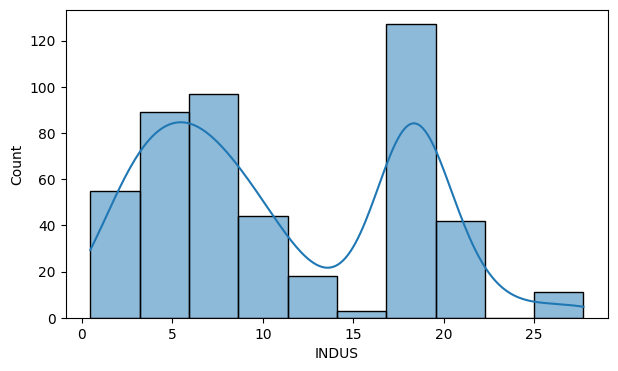

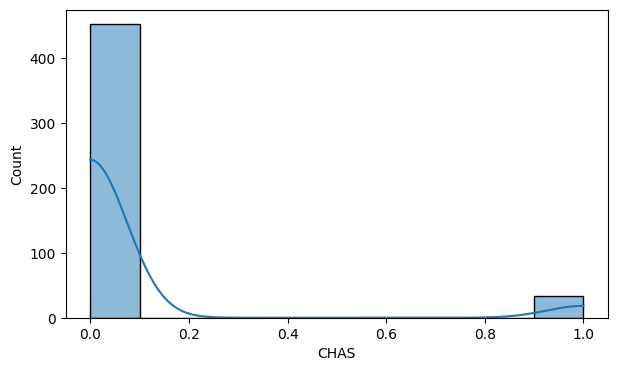

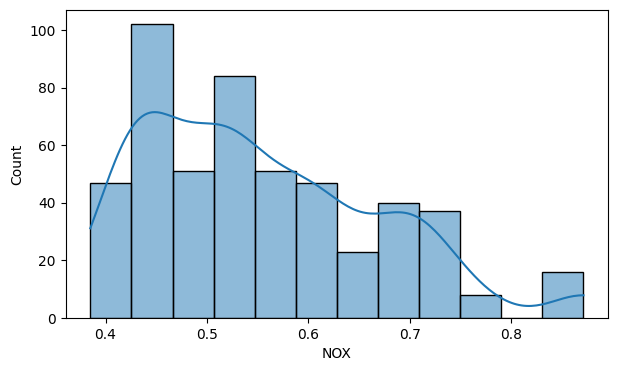

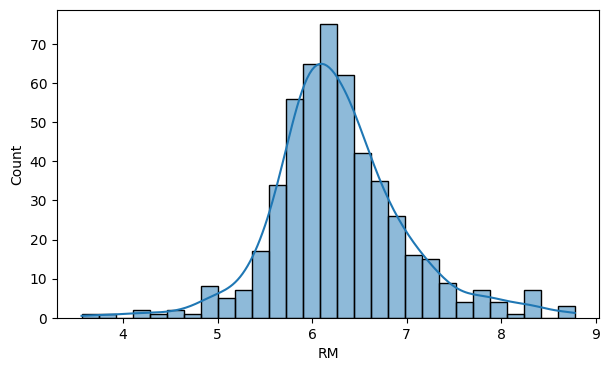

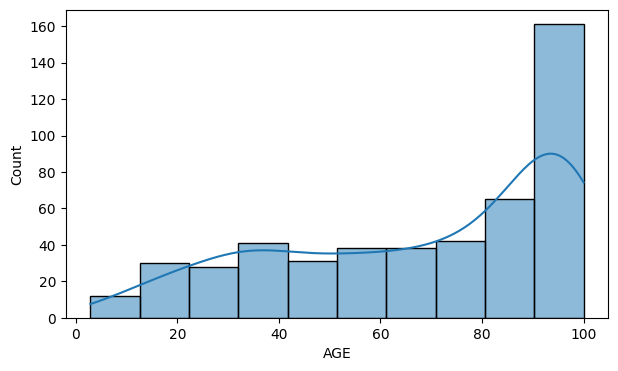

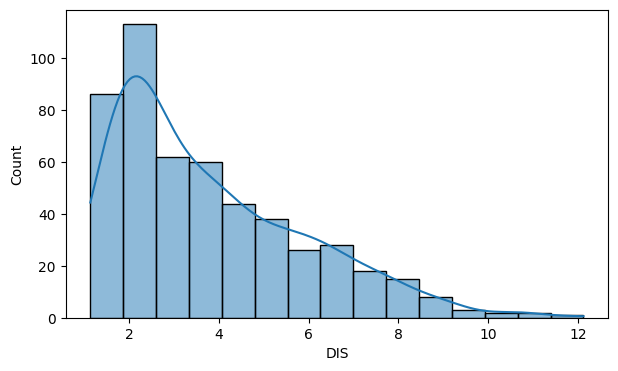

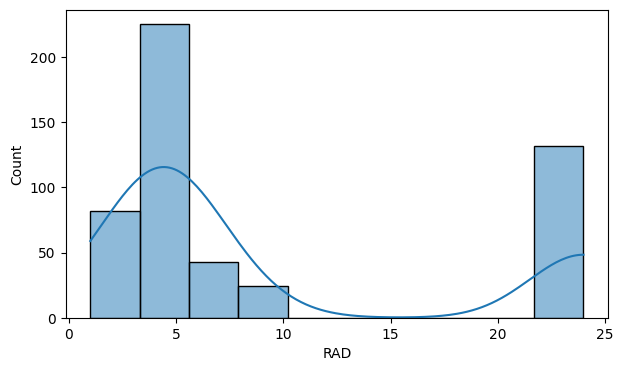

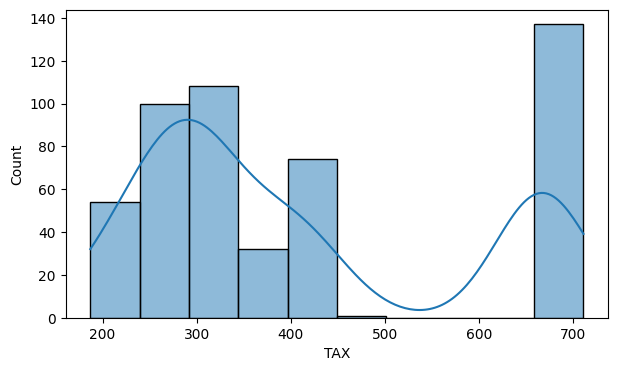

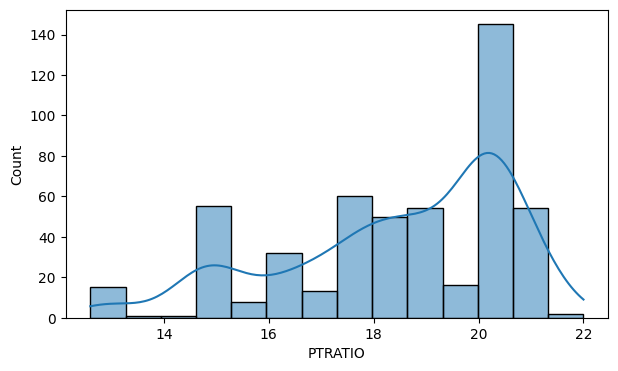

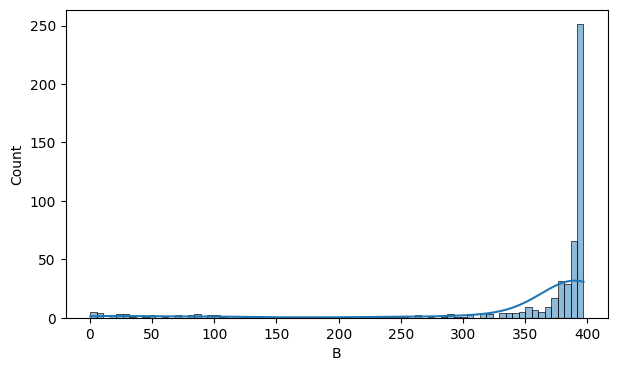

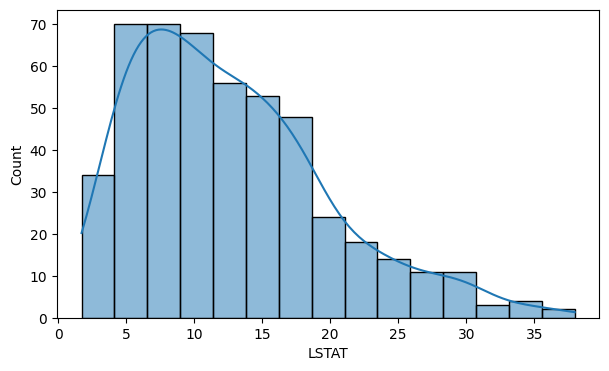

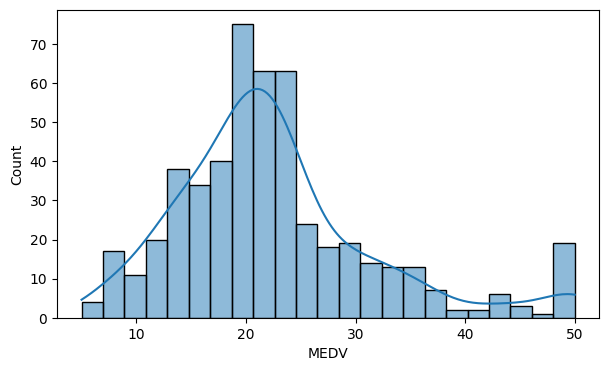

In [5]:
# Plotting all the columns to look at their distributions
for i in df.columns:

    plt.figure(figsize = (7, 4))

    sns.histplot(data = df, x = i, kde = True)

    plt.show()

In [6]:
df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

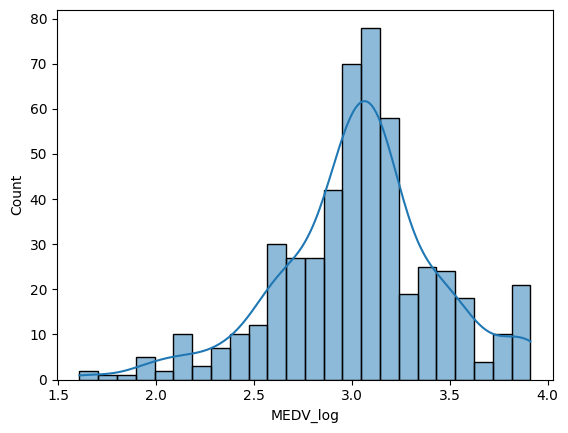

In [7]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

### **Bivariate Analysis**

**Check the correlation using heatmap**

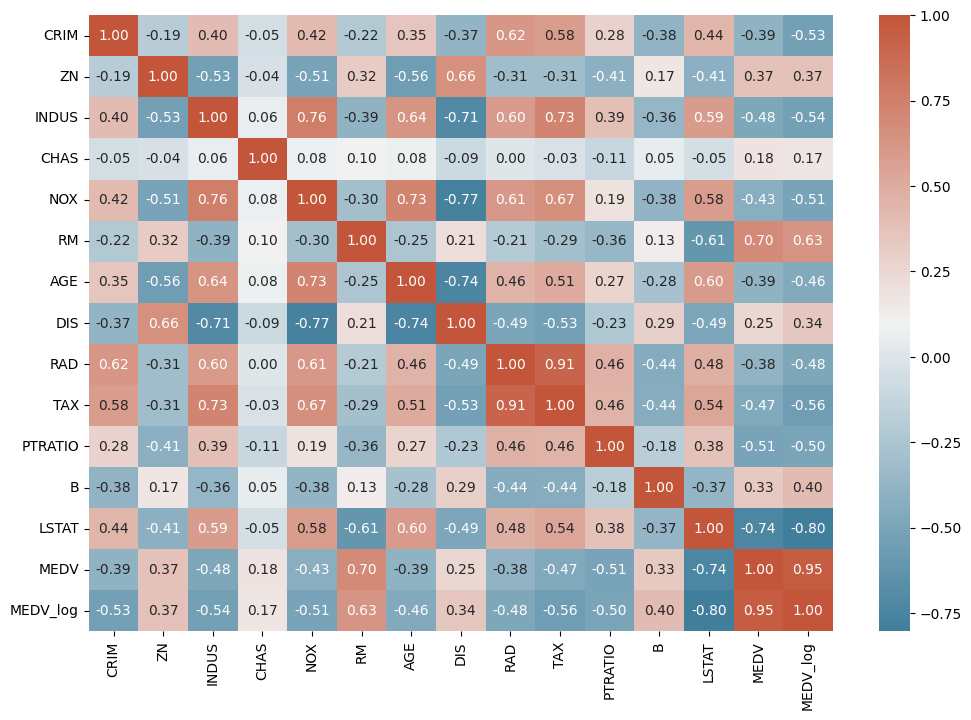

In [8]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

#### **Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)**

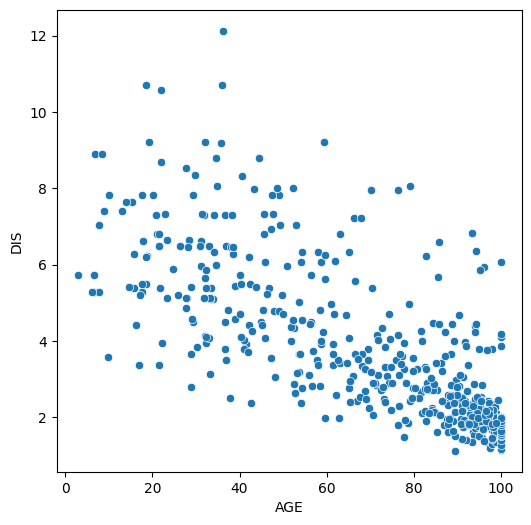

In [9]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

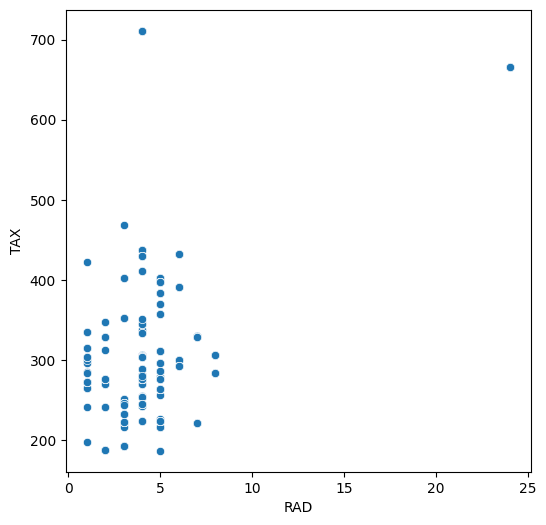

In [10]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

Check the correlation remains after removing the outliers.

In [11]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


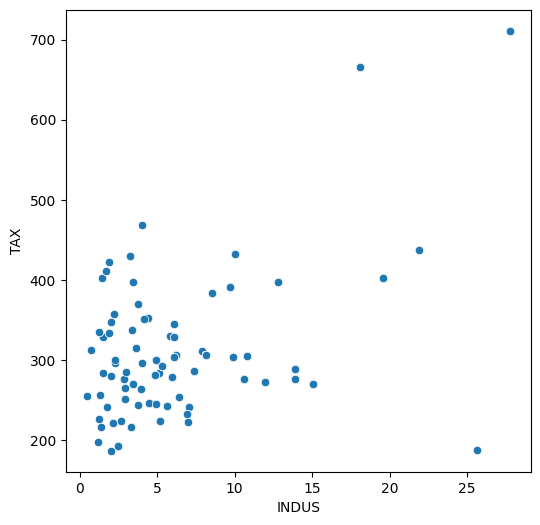

In [12]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

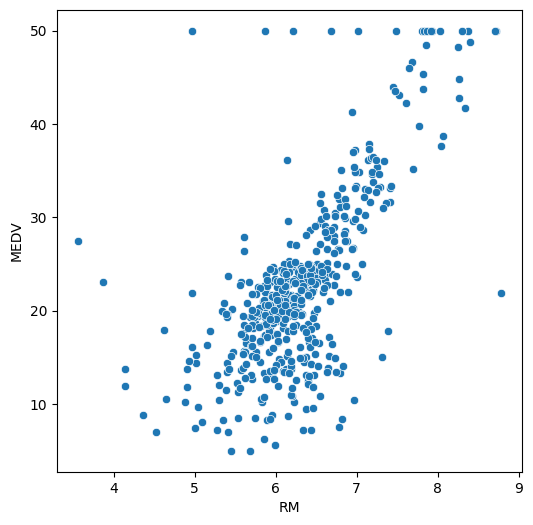

In [13]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

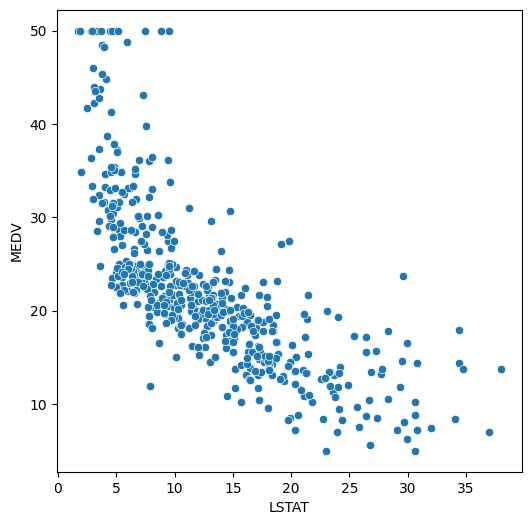

In [14]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.show()

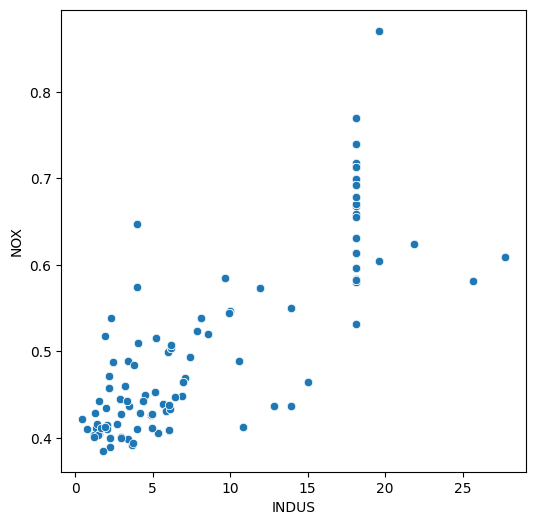

In [15]:
# Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)

plt.show()

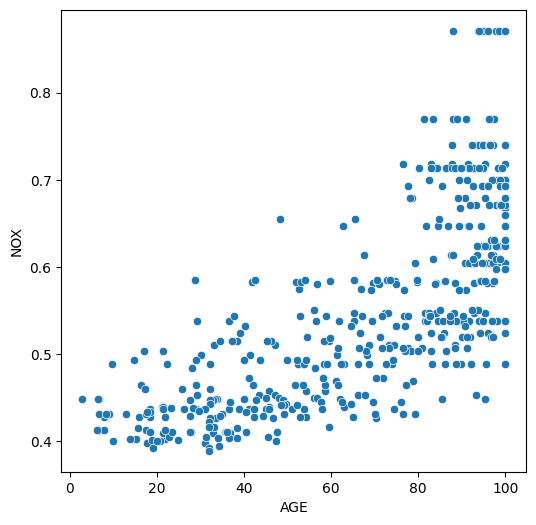

In [16]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'NOX', data = df)

plt.show()

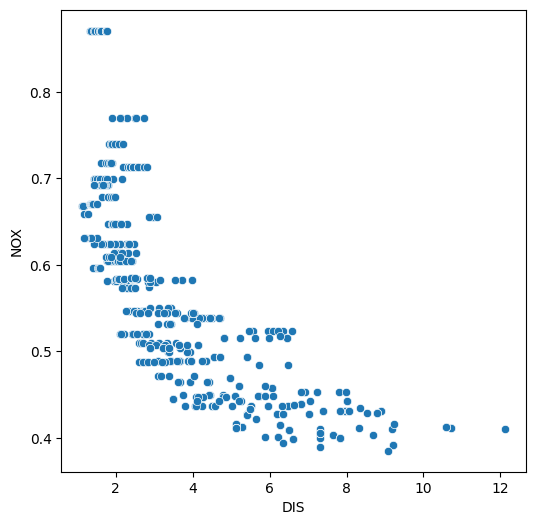

In [17]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'DIS', y = 'NOX', data = df)

plt.show()

In [18]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [19]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

check the multicollinearity in the training dataset.

## **Model Building**

### **Linear Regression Model1**

### **Model2 - Using significant variables**

In [ ]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(['ZN','AGE','INDUS'], axis=1)

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train,X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.064e+28
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:37:29   Log-Likelihood:                 11011.
No. Observations:                 354   AIC:                        -2.200e+04
Df Residuals:                     342   BIC:                        -2.195e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.104e-15   1.72e-14      0.530      0.596   -2.47e-14    4.29e-14
CRIM       -1.431e-16   7.89e-17     -1.814      0.071   -2.98e-16     1.2e-17
CHAS        1.416e-15   1.52e-15      0.928      0.354   -1.58e-15    4.41e-15
NOX        -5.163e-15   6.96e-15     -0.741      0.459   -1.89e-14    8.53e-15
RM         -3.886e-16   8.42e-16     -0.462      0.645   -2.04e-15    1.27e-15
DIS         -1.11e-16    3.2e-16     -0.347      0.729   -7.41e-16    5.19e-16
RAD         3.123e-17    1.3e-16      0.241      0.810   -2.24e-16    2.86e-16
TAX        -2.602e-18   6.67e-18     -0.390      0.697   -1.57e-17    1.05e-17
PTRATIO    -3.053e-16    2.6e-16     -1.173      0.242   -8.17e-16    2.07e-16
LSTAT      -1.041e-17   1.08e-16     -0.097      0.923   -2.22e-16    2.02e-16
MEDV       -4.857e-17   1.86e-16     -0.261      0.795   -4.15e-16    3.18e-16
MEDV_log       1.0000   4.75e-15    2.1e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                      141.725   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.558
Skew:                           1.661   Prob(JB):                    1.81e-145
Kurtosis:                       8.844   Cond. No.                     1.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, we will check the linear regression assumptions.

##### **1. Check for mean residuals**

In [ ]:
residuals = model2.resid

np.mean(residuals)

7.338135121519608e-15

##### **2. Check for homoscedasticity**

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

[('F statistic', 12.474530449630052), ('p-value', 1.9164807503085753e-48)]

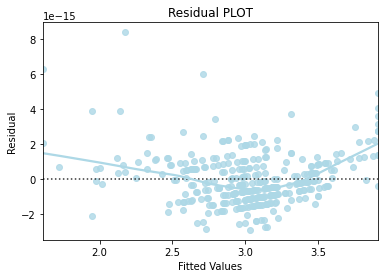

In [ ]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

<AxesSubplot:ylabel='Count'>

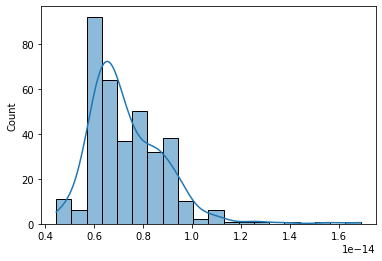

In [ ]:
# Plot histogram of residuals

sns.histplot(residuals, kde = True)

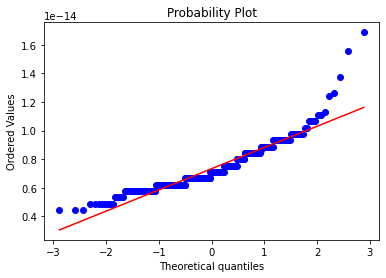

In [ ]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

### **Check the performance of the model on the train and test data set**

In [ ]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

## R2
from sklearn.metrics import r2_score


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)

    Data          RMSE           MAE          MAPE   r2
0  Train  7.504024e-15  7.338135e-15  2.509778e-13  1.0
1   Test  7.552803e-15  7.384444e-15  2.490217e-13  1.0


### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 1.000 (+/- 0.000)
Mean Squared Error: 0.000 (+/- 0.000)


In [ ]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,9.103829e-15
1,CRIM,-1.431147e-16
2,CHAS,1.415534e-15
3,NOX,-5.162537e-15
4,RM,-3.885781e-16
5,DIS,-1.110223e-16
6,RAD,3.122502e-17
7,TAX,-2.602085e-18
8,PTRATIO,-3.053113e-16
9,LSTAT,-1.040834e-17


In [ ]:
# Let us write the equation of the fit

Equation = "log (Price) = "

print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) = 	( 9.103828801926284e-15 ) *  const + ( -1.4311468676808659e-16 ) *  CRIM + ( 1.4155343563970746e-15 ) *  CHAS + ( -5.162537064506978e-15 ) *  NOX + ( -3.885780586188048e-16 ) *  RM + ( -1.1102230246251565e-16 ) *  DIS + ( 3.122502256758253e-17 ) *  RAD + ( -2.6020852139652106e-18 ) *  TAX + ( -3.0531133177191805e-16 ) *  PTRATIO + ( -1.0408340855860843e-17 ) *  LSTAT + ( -4.85722573273506e-17 ) *  MEDV + ( 0.9999999999999991 ) *  MEDV_log + 